In [1]:
#This program generates the FIG.5A
#Schematics of STDP rule

In [2]:
from brian2 import *
import matplotlib.pyplot as plt

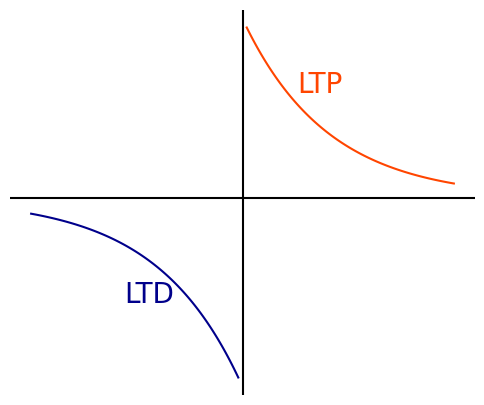

In [3]:
#parameters 
tau_pre = tau_post = 20*ms
A_pre = 0.02
A_post = -A_pre*1.05
delta_t = linspace(-50, 50, 100)*ms
delta_t_plus = linspace(1, 50, 100)*ms
delta_t_minus = linspace(-50, -1, 100)*ms
W_plus=A_post*exp(delta_t_plus/tau_post)
W_minus=A_pre*exp(-delta_t_minus/tau_pre)

#Create figure
f, ax= plt.subplots(figsize=(6,5))
#Layout
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#plot
plt.plot(delta_t_plus/ms, W_minus,color='orangered')
plt.plot(delta_t_minus/ms, W_plus,color='darkblue')

axhline(0, ls='-', c='k');
axvline(0, ls='-', c='k');

plt.text(13,0.15,'LTP',color='orangered',rotation=360,size=20)
plt.text(-28,-0.15,'LTD',color='darkblue',rotation=360,size=20)


#TO DELETE THE EDGES
ax.axis('off')
ax.xaxis.set_visible(False)

#Save fig
plt.savefig('../IMAGES/Fig4A_stdp_schematics.png')

#Show fig
plt.show()

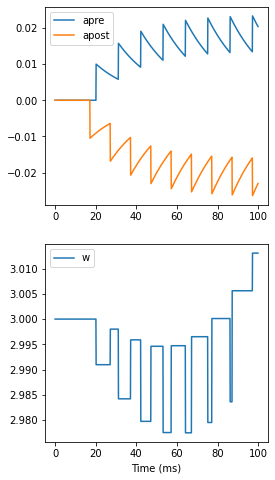

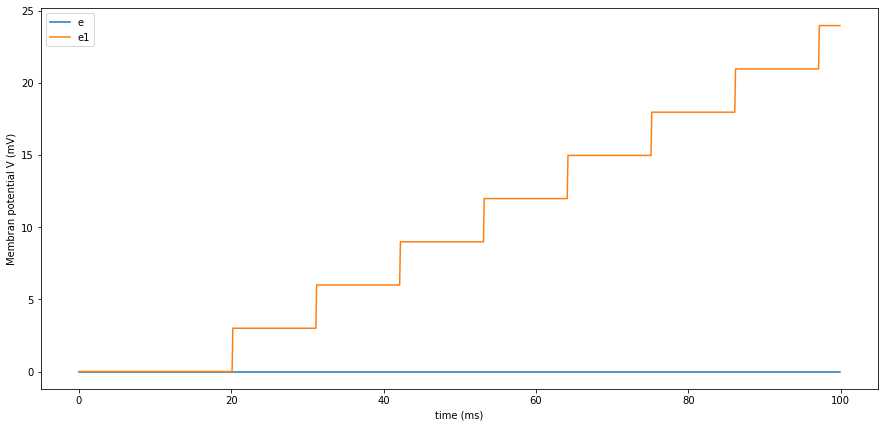

In [3]:
#Example of Spike time dependend plasticity
start_scope()

taupre = 20*ms
taupost = 20*ms
wmax = 1
dApre = 0.01
dApost = -dApre*taupre/taupost*1.05

G = NeuronGroup(1, 'v:1', threshold='t>(1+i)*20*ms', refractory=11*ms)
G1 = NeuronGroup(1, 'v:1', threshold='t>(1+i)*17*ms', refractory=10*ms)


S = Synapses(G, G1,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (clock-driven) #(event-driven) 
             dapost/dt = -apost/taupost : 1 (clock-driven) #(event-driven)  
             ''',
             on_pre='''
             v_post += w
             apre += dApre
             w=w+apost #w = clip(w + apost, 0, wmax)
             ''',
             on_post='''
             apost += dApost
             w=w + apre #w = clip(w + apre, 0, wmax)
             
             ''', method='linear')

S.connect()
S.w=3 #TO INITIALIZE w
M = StateMonitor(S, ['w', 'apre', 'apost'], record=True)

m=StateMonitor(G,'v', record=True)
m1=StateMonitor(G1,'v', record=True)

run(100*ms)

figure(figsize=(4, 8))
subplot(211)
plot(M.t/ms, M.apre[0], label='apre')
plot(M.t/ms, M.apost[0], label='apost')
#plot(M.t/ms, M.apre[1], label='apre1')
#plot(M.t/ms, M.apost[1], label='apost1')

legend()
subplot(212)
plot(M.t/ms, M.w[0], label='w')
legend(loc='best')
xlabel('Time (ms)');


fig2 = plt.figure(figsize=(15,7))
plot(m.t/ms,m.v[0],label='e')
plot(m1.t/ms,m1.v[0],label='e1')
xlabel('time (ms)')
ylabel('Membran potential V (mV)')
legend()
show()